 ## Importing Necessary Libraries for Data Exploration

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## About the Dataset
 This dataset focuses on predicting the recurrence of well-differentiated thyroid cancer using 13 clinicopathologic features. The data spans over 15 years, with each patient followed for at least 10 years. It originates from the UCI Machine Learning Repository and is hosted on Kaggle.

Key Features Include:

Demographics: Age, Gender

Medical History: Smoking status, History of smoking, History of radiotherapy

Clinical Info: Thyroid function, Physical exam results, Presence of adenopathy

Cancer Details: Pathology type, Focality, Risk category, Tumor (T), Node (N), Metastasis (M), Cancer Stage

Outcomes: Response to treatment, Whether the cancer recurred

This dataset provides a rich foundation for building models to assess cancer recurrence risk based on both clinical and pathological data.

## Load the Dataset

In [28]:
th = pd.read_csv(r"D:\Machine Learning\Cloned File\Thyroid-Diseases-Detection\archive\Thyroid_Diff.csv")

In [29]:
th.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Variable Identification

In [30]:
print("Dataset shape:", th.shape)


Dataset shape: (383, 17)


In [31]:
th.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [32]:
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [55]:
th.describe()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Adenopathy,Focality,Risk,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,277.0,383.000000,281.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,0.0,1.355091,1.227758,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.0,0.479167,0.636462,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.000000,3.000000,1.000000


In [54]:
#Target variable distribution
print(th['Recurred'].value_counts())


Recurred
0    275
1    108
Name: count, dtype: int64


## Missing value Anlysis

In [33]:
print(th.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


## Graph


The **Gender Distribution Count Plot** shows that the majority of patients in the dataset are female, reflecting the higher prevalence of thyroid disease in women.
The **Recurrence Rate by Gender (%)** graph reveals that although fewer males are present, their cancer recurrence rate is significantly higher compared to females.



Gender
F    312
M     71
Name: count, dtype: int64


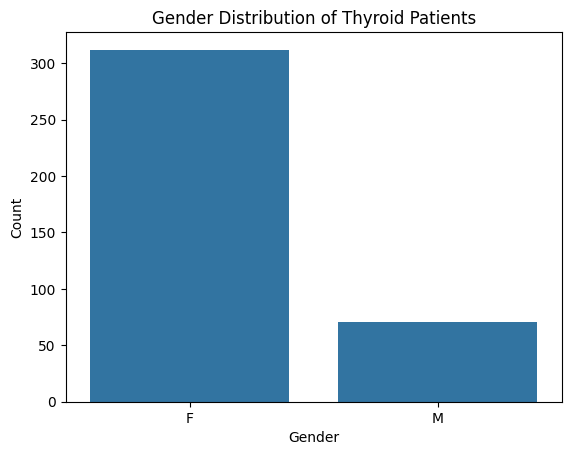

In [34]:

gender_counts = th['Gender'].value_counts()

print(gender_counts)

#Gender Distribution Count Plot
sns.countplot(data=th, x='Gender')
plt.title('Gender Distribution of Thyroid Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Recurred         No        Yes
Gender                        
F         78.846154  21.153846
M         40.845070  59.154930


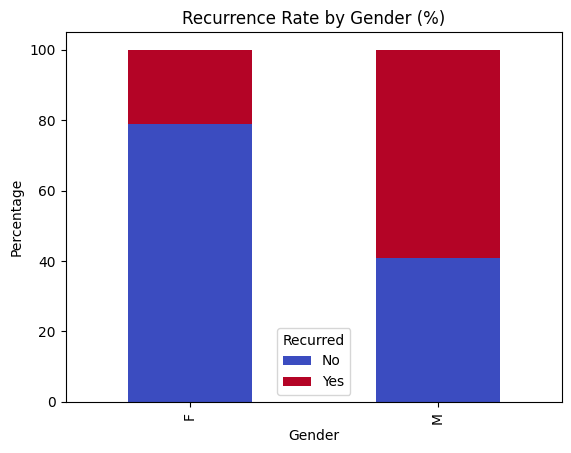

In [35]:
# Recurrence Rate by Gender (in %)
recurrence_by_gender = th.groupby('Gender')['Recurred'].value_counts(normalize=True).unstack() * 100
print(recurrence_by_gender)
recurrence_by_gender.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Recurrence Rate by Gender (%)')
plt.ylabel('Percentage')
plt.legend(title='Recurred')
plt.show()

## Outlier Analysis

Numerical columns: ['Age']


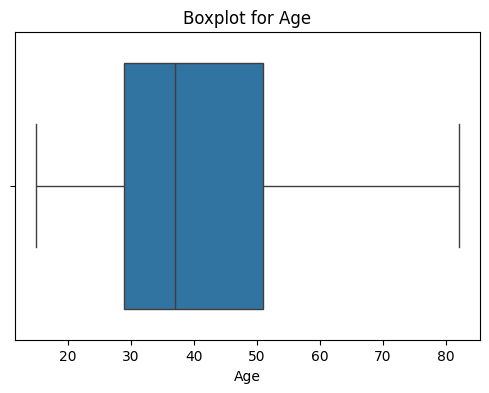

Age: 0 outliers
Outlier capping completed and file saved.


In [36]:
# identification numerical columns
numerical_cols = th.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

# Boxplots to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=th[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    
# outliers using IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    return outliers

for col in numerical_cols:
    detect_outliers_iqr(th, col)

# Capping outliers 
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] > upper_bound, upper_bound,
                 np.where(data[col] < lower_bound, lower_bound, data[col]))
    return data

for col in numerical_cols:
    th = cap_outliers(th, col)

# Save the cleaned dataset
th.to_csv('thyroid_cleaned.csv', index=False)
print("Outlier capping completed and file saved.")



## Data Handling

#### Binary Encoding
Binary categorical columns like Gender, Smoking, Hx Smoking, Hx Radiothreapy, Adenopathy, Recurred.

In [37]:
binary_map = {'No': 0, 'Yes': 1, 'F': 0, 'M': 1}

binary_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Adenopathy', 'Recurred']

for col in binary_cols:
    th[col] = th[col].map(binary_map)


#### Ordinal Encoding	
Ordinal columns like Risk {Low:1, Medium:2, High:3}	 and Focality {'Uni-Focal': 1, 'Multi-Focal': 2}

In [38]:
risk_map = {'Low': 1, 'Medium': 2, 'High': 3}
focality_map = {'Uni-Focal': 1, 'Multi-Focal': 2}

th['Risk'] = th['Risk'].map(risk_map)
th['Focality'] = th['Focality'].map(focality_map)


#### One-Hot Encoding

In [39]:
nominal_cols = ['Thyroid Function', 'Physical Examination', 'Pathology', 'Response', 'T', 'N', 'M', 'Stage']

th = pd.get_dummies(th, columns=nominal_cols, drop_first=True)



In [40]:
th.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Adenopathy,Focality,Risk,Recurred,Thyroid Function_Clinical Hypothyroidism,...,T_T3b,T_T4a,T_T4b,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB
0,27.0,0,0,0,0,0.0,1,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False
1,34.0,0,0,1,0,0.0,1,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,30.0,0,0,0,0,0.0,1,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,62.0,0,0,0,0,0.0,1,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,62.0,0,0,0,0,0.0,2,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
print(th['Recurred'].value_counts())


Recurred
0    275
1    108
Name: count, dtype: int64


The imbalance problem isn't that high. So,  currently sampling isn't mendatory.

## Data Split


In [42]:

# Separate features and target
X = th.drop('Recurred', axis=1)  # features
y = th['Recurred']               # target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
import pickle

# Save the feature column names (after encoding)
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

# Random Forest

#### Model Training


In [44]:

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


#### Model Evaluation

In [45]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.961038961038961

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



The random forest model achieved an impressive accuracy of 96.1% on the test dataset, indicating strong overall performance in predicting thyroid cancer recurrence.

For class 0 (No Recurrence):

Precision: 0.95 — 95% of predicted non-recurrence cases were correct.

Recall: 1.00 — The model successfully identified all actual non-recurrence cases.

F1-Score: 0.97 — Excellent balance between precision and recall.

For class 1 (Recurrence):

Precision: 1.00 — Every predicted recurrence case was truly a recurrence.

Recall: 0.86 — 86% of actual recurrence cases were correctly detected.

F1-Score: 0.93 — Strong performance, but slightly fewer true positives compared to class 0.

#### Confusion Matrix



Confusion Matrix:
[[55  0]
 [ 3 19]]


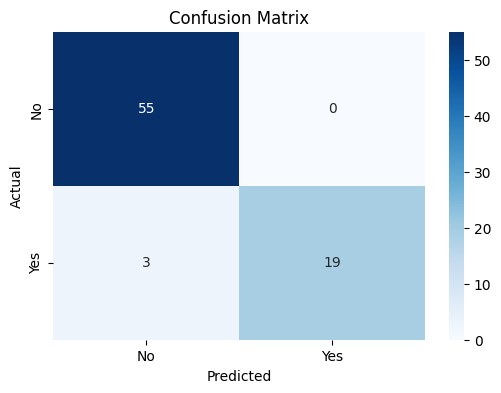

In [46]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Plotting ROC Curve & Calculating AUC

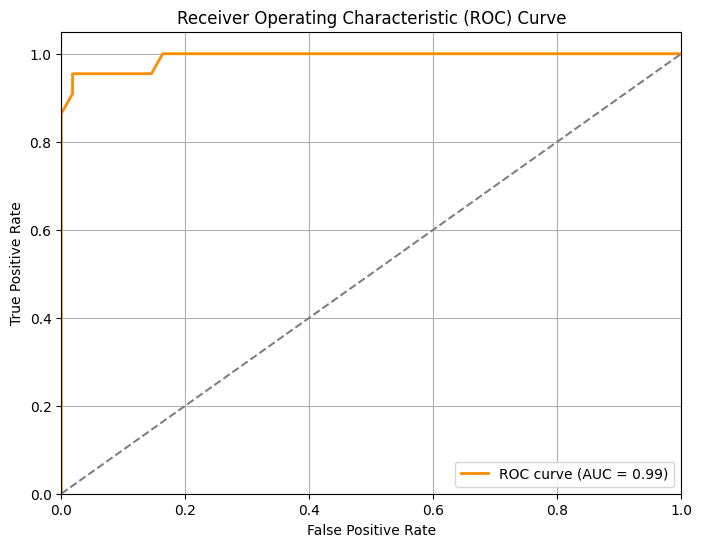

In [47]:

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # probability for class '1' (Recurred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# XGBoost


#### Model Training

In [48]:

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:55:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### Model Evaluation


In [49]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))



Accuracy: 0.974025974025974

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.95      0.95      0.95        22

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



The XGBoost model achieved an excellent accuracy of 97.4% on the test dataset, demonstrating high reliability in predicting thyroid cancer recurrence.

Class 0 (No Recurrence):

Precision: 0.98 — Almost all predicted non-recurrence cases were accurate.

Recall: 0.98 — The model correctly identified 98% of actual non-recurrence cases.

F1-Score: 0.98 — Indicates very high and balanced performance.

Class 1 (Recurrence):

Precision: 0.95 — 95% of predicted recurrence cases were correct.

Recall: 0.95 — The model captured 95% of actual recurrence cases.

F1-Score: 0.95 — Reflects a strong ability to detect recurrence.

Macro Average F1-Score: 0.97 — Shows balanced performance across both classes.

Weighted Average F1-Score: 0.97 — Indicates the model is robust even with class imbalance.

#### Confusion Matrix


Confusion Matrix:
[[55  0]
 [ 3 19]]


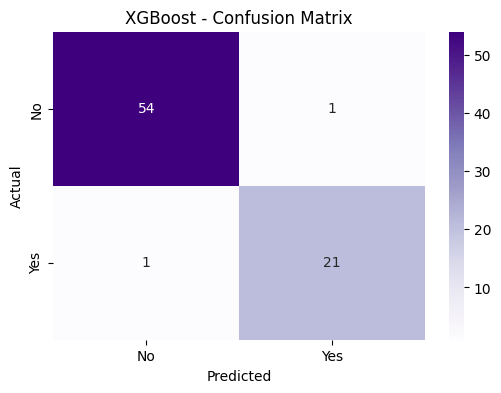

In [50]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Plotting ROC Curve & Calculating AUC

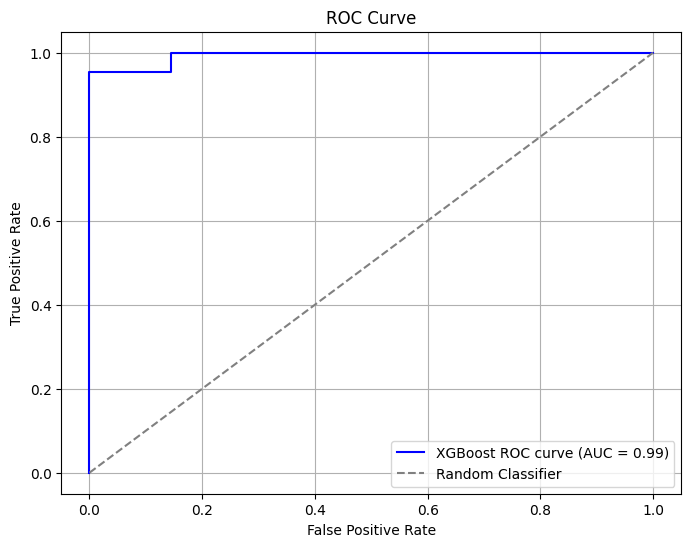

In [51]:

# Predict probabilities for the positive class (recurred=1)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Comparison


Random Forest performs well but shows slightly lower recall for recurrence cases (class 1), which means it misses more true recurrence cases.
 XGBoost provides better balance with higher recall and overall accuracy, making it more reliable for medical predictions where false negatives should be minimized.
 Conclusion: XGBoost outperforms Random Forest and is the better choice for this dataset, especially in correctly identifying recurrence cases.

## User Interface

In [52]:
import pickle

# Save model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)